<div style="text-align: right;font-weight:bold;font-size:large">Till Pfaff<br>3789265</div>

Full code available at https://github.com/till-robert/cs1_seminar/tree/main/task19


### 19. Autocorrelations of the 1D Ising model
Apply your analysis program of problem 17 to the time series of the
one-dimensional Ising model with Metropolis updates of problem 12.
Estimate (at least) for chain length $L = 100$ and $k_B T \, / \, J = 1$ the
exponential and integrated autocorrelation times of the magnetisation
and energy.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [72]:
def ACF(series,N_max):
    ACF_list = np.zeros(N_max)
    N = len(series)
    for k in range(N_max):
        sum = 0
        for i in range(N-k):
            sum += series[i]*series[i+k]
        ACF_list[k] = 1/(N-k) * sum

    squaredmean = np.mean(series)**2
    meansquared = np.mean(series**2)
    return (ACF_list - squaredmean)/(meansquared-squaredmean)

In [73]:
E_series, M_series = np.loadtxt("out/timeseries.txt").T[:,1000:]


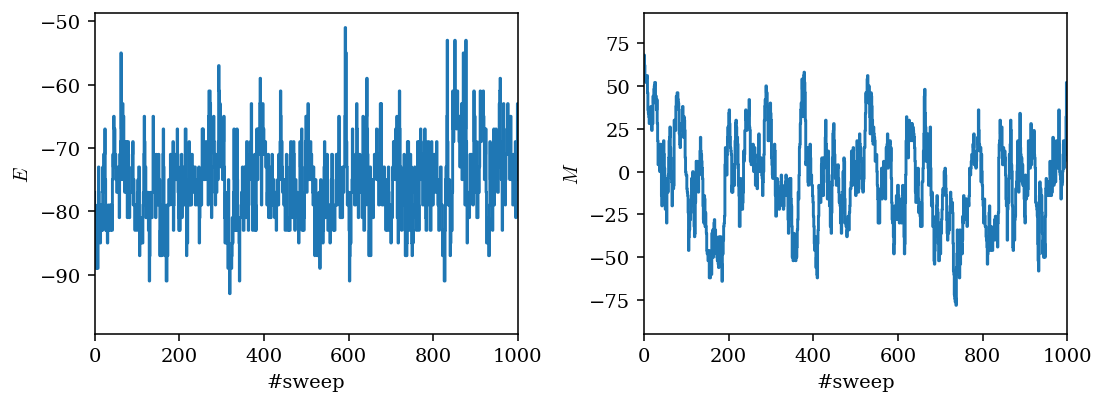

In [74]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.step(np.arange(9000),E_series)
plt.xlim(0,1000)
plt.xlabel("#sweep")
plt.ylabel("$E$")

plt.subplot(1,2,2)
plt.step(np.arange(9000),M_series)
plt.xlabel("#sweep")
plt.xlim(0,1000)
plt.ylabel("$M$")

plt.show()

In [79]:
k_max_E = 20
k_max_M = 50
acf_E = ACF(E_series,k_max_E)
acf_M = ACF(M_series,k_max_M)

In [80]:
def rho_fit(k,rho):
    return rho**k

E_params, _ = curve_fit(rho_fit,np.arange(k_max_E),acf_E)
M_params, _ = curve_fit(rho_fit,np.arange(k_max_M),acf_M)

print(f"ρ_E = {E_params[0]:.3f}, ρ_M = {M_params[0]:.3f}")

ρ_E = 0.711, ρ_M = 0.931


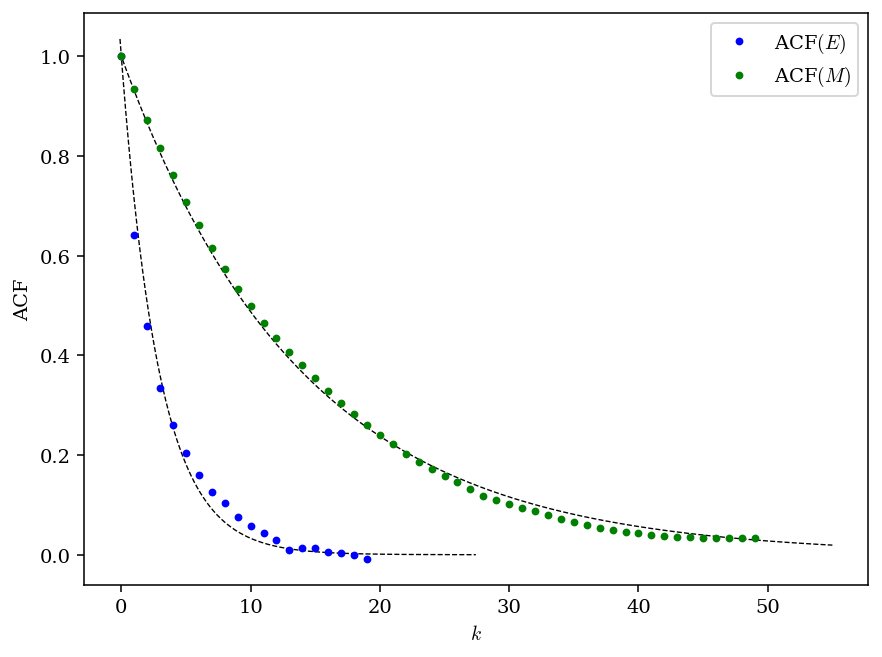

In [95]:
x = np.linspace(-0.1,55,1000)

plt.plot(x[:500],rho_fit(x[:500],*E_params),"k--",lw=0.7)
plt.plot(np.arange(k_max_E),acf_E,"b.",label=r"ACF$(E)$")
plt.plot(x,rho_fit(x,*M_params),"k--",lw=0.7)
plt.plot(np.arange(k_max_M),acf_M,"g.",label=r"ACF$(M)$")

plt.xlabel("$k$")
plt.ylabel("ACF")
plt.legend()
plt.show()

In [82]:

tau_exp_E = -1/np.log(E_params[0])
tau_exp_M = -1/np.log(M_params[0])

print(f"tau_exp:")
print(f"τ_E = {tau_exp_E:.3f}")
print(f"τ_M = {tau_exp_M:.3f}")

tau_int_numeric = lambda acf: 1/2 + np.sum(acf)

tau_int_E = tau_int_numeric(acf_E)

tau_int_M =  tau_int_numeric(acf_M)

print(f"\ntau_int:")
print(f"τ_E = {tau_int_E:.3f}")
print(f"τ_M = {tau_int_M:.3f}")

tau_exp:
τ_E = 2.931
τ_M = 13.923

tau_int:
τ_E = 4.037
τ_M = 14.447
